#Importación de datos

In [144]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
properati = pd.read_csv('/content/drive/MyDrive/Utn/TP_final_clusterAI/properati_capital.csv')

In [146]:
properati.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,63934,MlnOILxnUwm3KXFnNyOJig==,Propiedad,2020-07-06,2021-04-07,2020-07-06,-34.618041,-58.475124,Argentina,Capital Federal,...,1.0,NaN,NaN,89000.0,USD,NaN,Galicia 2800 Depto 2 Ambientes Con Balcón Vill...,XINTEL(JUM-JUM-313) \n\nExcelente departament...,Departamento,Venta
1,660204,FiY707h094LvsqOGHohO9Q==,Propiedad,2020-07-17,9999-12-31,2020-07-17,-34.620686,-58.453972,Argentina,Capital Federal,...,2.0,NaN,NaN,190000.0,USD,NaN,DEPARTAMENTO A ESTRENAR AL FRENTE CON COCHERA,EXCELENTE DPTO A ESTRENAR AL FRENTE CON COCHER...,Departamento,Venta
2,961496,VKAgMtgXuRfeD2XHnLPWNQ==,Propiedad,2020-06-19,2020-12-03,2020-06-19,-34.590569,-58.425215,Argentina,Capital Federal,...,2.0,98.0,68.0,360000.0,USD,NaN,Excelente departamento 4 ambientes con terraza...,Patio El Salvador . inicio de obra nmarzo 2019...,Departamento,Venta
3,292569,H56oekWpzEOKT5aXM43WLA==,Propiedad,2021-02-24,2021-03-01,2021-02-24,-34.577440,-58.485041,Argentina,Capital Federal,...,1.0,118.0,96.0,285000.0,USD,NaN,Venta depto 4 ambientes/terraza en V. Urquiza,Corredor Responsable: MARIANO AUFSEHER - CPI 4...,Departamento,Venta
4,278737,FPPomZ4bizdYOzH9KlsLDg==,Propiedad,2020-11-17,2021-04-13,2020-11-17,-34.615851,-58.439566,Argentina,Capital Federal,...,1.0,61.0,52.0,145000.0,USD,NaN,Departamento de 2 ambientes c terraza a estrenar,Corredor Responsable: MARCELO GRUNBAUM - CMCPS...,Departamento,Venta


#Limpieza y preprocesamiento

In [147]:
print(properati.shape)

filas = np.shape(properati)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(properati)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}')

(38656, 26)
Filas: 38656
Columnas: 26


In [148]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       38656 non-null  int64  
 1   id               38656 non-null  object 
 2   ad_type          38656 non-null  object 
 3   start_date       38656 non-null  object 
 4   end_date         38656 non-null  object 
 5   created_on       38656 non-null  object 
 6   lat              36585 non-null  float64
 7   lon              36585 non-null  float64
 8   l1               38656 non-null  object 
 9   l2               38656 non-null  object 
 10  l3               38519 non-null  object 
 11  l4               1145 non-null   object 
 12  l5               0 non-null      float64
 13  l6               0 non-null      float64
 14  rooms            36095 non-null  float64
 15  bedrooms         31121 non-null  float64
 16  bathrooms        36320 non-null  float64
 17  surface_tota

In [149]:
#eliminar  variables con 0 non-null
properati = properati.drop(['price_period','l6','l5'],axis=1)
properati.shape

(38656, 23)

In [150]:
#properati.describe()
#properati.isnull().sum().sort_values(ascending=False)
total = properati.isnull().sum().sort_values(ascending=False)
porcentaje = (properati.isnull().sum()/properati.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
missing_data

,Total,Porcentaje
l4,37511,0.970380
surface_total,16011,0.414192
surface_covered,15978,0.413338
bedrooms,7535,0.194924
rooms,2561,0.066251
bathrooms,2336,0.060430
lat,2071,0.053575
lon,2071,0.053575
l3,137,0.003544
property_type,0,0.000000


In [151]:
#eliminar variable l4 porque esta 97% vacia
properati = properati.drop(['l4'],axis=1)


In [152]:
#eliminar samples con pocos nulos (menos del 7%)
properati = properati.dropna(axis=0, subset=['l3','lon','lat','bathrooms','rooms']) 
print(properati.shape)

(32278, 22)


In [153]:
#eliminar publicaciones duplicadas
properati.drop_duplicates(subset='id', inplace=True, keep='first')
properati.drop_duplicates(subset=['title', 'description'], keep='last')
#mostrar como quedo la cantidad de nulos por variables
properati.isnull().sum().sort_values(ascending=False)

surface_covered    9035
surface_total      9034
bedrooms           4372
Unnamed: 0            0
id                    0
property_type         0
description           0
title                 0
currency              0
price                 0
bathrooms             0
rooms                 0
l3                    0
l2                    0
l1                    0
lon                   0
lat                   0
created_on            0
end_date              0
start_date            0
ad_type               0
operation_type        0
dtype: int64

In [154]:
print(properati['ad_type'].value_counts(normalize=True,dropna=False))
print(properati['l1'].value_counts(normalize=True,dropna=False))
print(properati['l2'].value_counts(normalize=True,dropna=False))
print(properati['currency'].value_counts(normalize=True,dropna=False))
print(properati['operation_type'].value_counts(normalize=True,dropna=False))

Propiedad    1.0
Name: ad_type, dtype: float64
Argentina    1.0
Name: l1, dtype: float64
Capital Federal    1.0
Name: l2, dtype: float64
USD    1.0
Name: currency, dtype: float64
Venta    1.0
Name: operation_type, dtype: float64


In [155]:
#eliminar variables con solo dato
properati = properati.drop(['ad_type','l1','l2','currency','operation_type'],axis=1)
#eliminar variables sin datos que importen (id y unnamed:0)
properati = properati.drop(['id','Unnamed: 0','title', 'description','start_date','end_date','created_on'],axis=1)
print(properati.shape)

(25355, 10)


In [156]:
properati.head()



,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.618041,-58.475124,Villa del Parque,2.0,1.0,1.0,NaN,NaN,89000.0,Departamento
1,-34.620686,-58.453972,Caballito,3.0,2.0,2.0,NaN,NaN,190000.0,Departamento
2,-34.590569,-58.425215,Palermo,3.0,2.0,2.0,98.0,68.0,360000.0,Departamento
3,-34.577440,-58.485041,Villa Urquiza,4.0,4.0,1.0,118.0,96.0,285000.0,Departamento
4,-34.615851,-58.439566,Caballito,2.0,11.0,1.0,61.0,52.0,145000.0,Departamento


#EDA

In [157]:
#Identificación de valores únicos
print(properati['rooms'].unique())
print(properati['bathrooms'].unique())
print(properati['bedrooms'].unique())

[ 2.  3.  4.  1.  7.  5.  8.  6. 15.  9. 10. 14. 22. 11. 20. 19. 12. 18.]
[1. 2. 4. 3. 6. 5. 8. 7. 9.]
[ 1.  2.  4. 11.  0.  5. nan  3.  7. 14.  8.  6. 10. 18. 60.  9. 12. 17.]


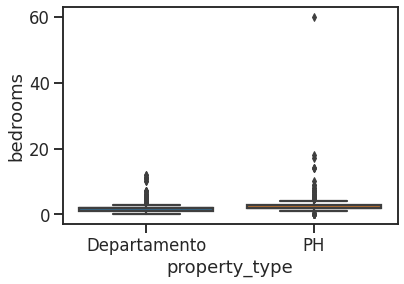

In [158]:
sns.boxplot(data=properati, x="property_type", y="bedrooms",orient="v")


[ 1.  2.  4. 11.  0.  5. nan  3.  7. 14.  8.  6. 10. 18.  9. 12. 17.]


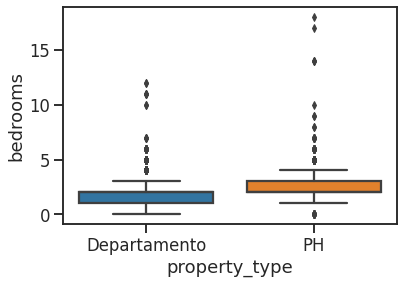

In [159]:
m=properati['bedrooms'].mean()
m=np.round(m).astype(int)
properati['bedrooms']=properati['bedrooms'].replace(60,m)
print(properati['bedrooms'].unique())
sns.boxplot(data=properati, x="property_type", y="bedrooms",orient="v")

In [160]:
#Imputación de nulos
properati['surface_total'].fillna(properati['surface_total'].mean(), inplace = True)
properati['surface_covered'].fillna(properati['surface_covered'].mean(), inplace = True)
properati['bedrooms'].fillna(properati['bedrooms'].median(), inplace = True)
properati.isnull().sum().sort_values(ascending=False)

lat                0
lon                0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

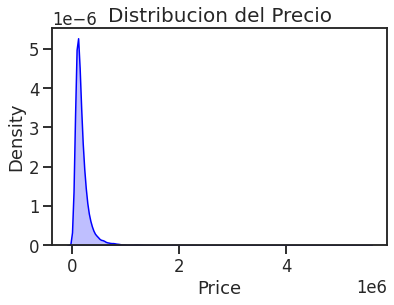

In [161]:
#sns.histplot(data=properati, x="price", bins= 60)
sns.kdeplot(properati.price, color="b", shade = True)
plt.xlabel("Price")
plt.title('Distribucion del Precio',size = 20)
plt.show()

In [162]:
#Desestimación de outliers de precio
price_quantile95 = properati.price.quantile(0.95)
properati = properati.loc[(properati.price < price_quantile95)]
print(properati.shape)

(24084, 10)


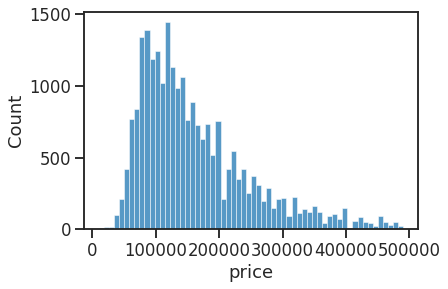

In [163]:
sns.histplot(data=properati, x="price", bins= 60)

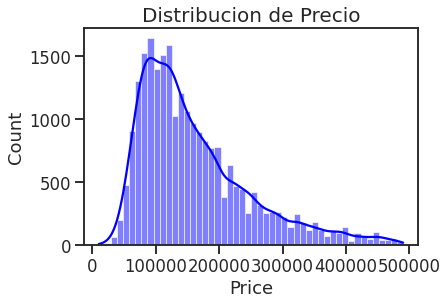

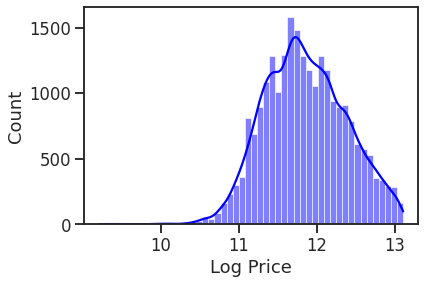

In [164]:
#Columna log precios
properati['log_price'] = np.log(1+properati['price'])

#Plot Precio
sns.histplot(properati['price'],bins=50,color='b',kde=True,stat='count')
plt.xlabel("Price")
plt.title('Distribucion de Precio',size = 20)
plt.show()

#Plot Log-Precio
sns.histplot(properati['log_price'],bins=50,color='b',kde=True,stat='count')
plt.xlabel("Log Price")
plt.show()

In [165]:
properati.log_price.head()

0    11.396403
1    12.154785
2    12.793862
3    12.560248
4    11.884496
Name: log_price, dtype: float64

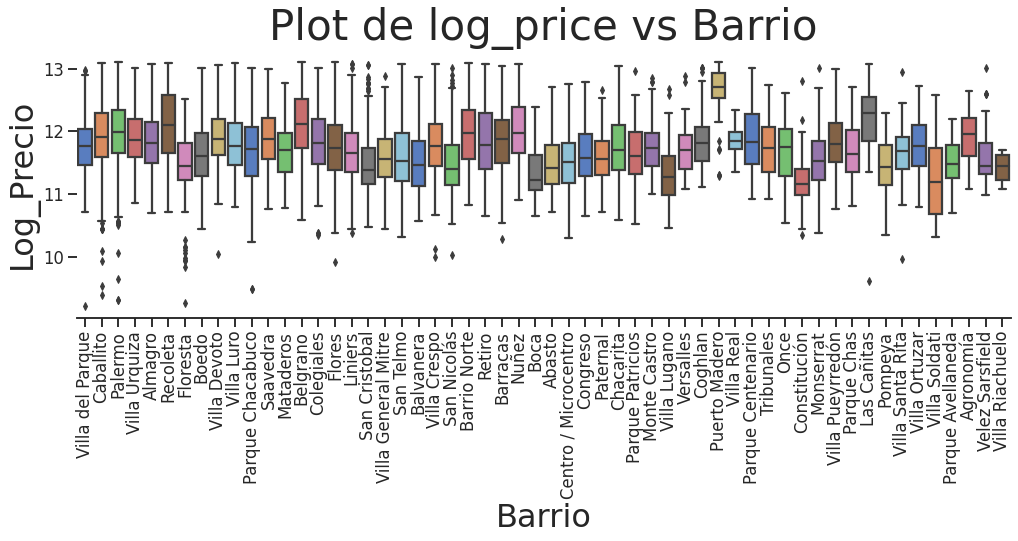

In [166]:
#Boxplot de la variable log_precio
g = sns.catplot(data=properati,
                x='l3',y='log_price', 
                kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("Barrio",fontsize=32)
plt.ylabel("Log_Precio",fontsize=32)
plt.title('Plot de log_price vs Barrio',size = 42)
plt.show()

,Mediana,Lim. Inferior,Lim. Superior
Puerto Madero,12.706851,12.538044,13.100631


,Mediana,Lim. Inferior,Lim. Superior
Villa Soldati,11.190761,10.683986,12.57764


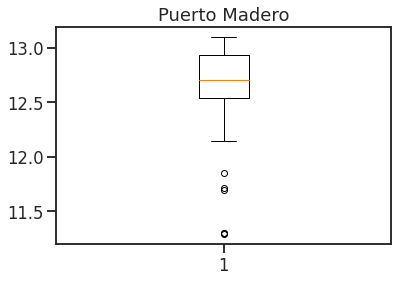

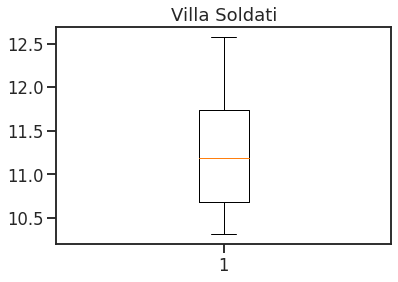

In [167]:
# Mediana, Limite inferior y superior del 'Barrio' con mayor y menor precio.

grup1 = 'Puerto Madero'
properati_pivot = properati[properati['l3']==grup1]
plt.figure()
A = plt.boxplot(properati_pivot['log_price'])
plt.title(grup1)
medians = [median.get_ydata() for median in A["medians"]]
#whiskers
whiskers = [whiskers.get_ydata() for whiskers in A["whiskers"]]
#print(f'Valores outliers:\r\n{outliers[0]}\r\n')
properati2delete = pd.DataFrame({'Mediana': medians[0][0],
                            'Lim. Inferior': whiskers[0][0],
                            'Lim. Superior': whiskers[1][1]},index=[grup1])
display(properati2delete)
grup2 = 'Villa Soldati'
properati_pivot= properati[properati['l3']==grup2]
plt.figure()
A = plt.boxplot(properati_pivot['log_price'])
plt.title(grup2)
medians = [median.get_ydata() for median in A["medians"]]
#whiskers
whiskers = [whiskers.get_ydata() for whiskers in A["whiskers"]]
properati2delete = pd.DataFrame({'Mediana': medians[0][0],
                            'Lim. Inferior': whiskers[0][0],
                            'Lim. Superior': whiskers[1][1]},index=[grup2])
display(properati2delete)

#print(f'Valores outliers:\r\n{outliers[0]}\r\n')

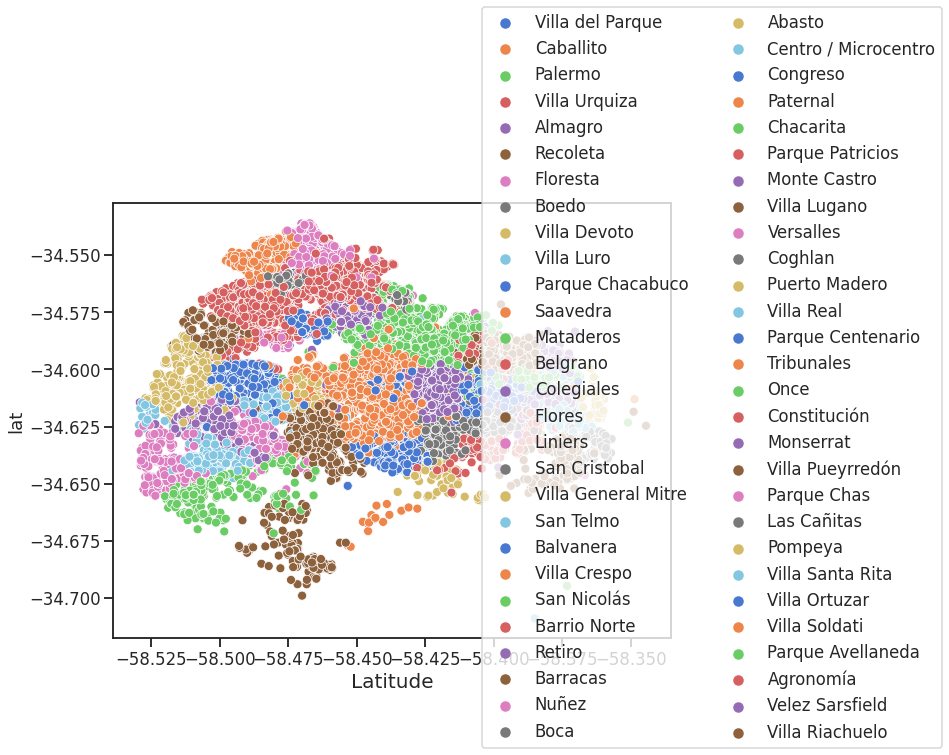

In [168]:
plt.figure(figsize=(10,8))
g = sns.scatterplot(x=properati.lon,y=properati.lat,
                hue=properati.l3,palette='muted')
plt.xlabel("Longitude",fontsize=20)
plt.xlabel("Latitude",fontsize=20)
g.legend(loc='right', bbox_to_anchor=(1.5, 0.6), ncol=2)

plt.show()

In [169]:
properati.property_type.value_counts(normalize=True)

Departamento    0.889968
PH              0.110032
Name: property_type, dtype: float64

In [170]:
#Creación de bandas de precio
properati.loc[(properati['price'] > 0) & (properati['price'] <= 100000), 'Banda'] = 1
properati.loc[(properati['price'] > 100000) & (properati['price'] <= 200000), 'Banda']   = 2
properati.loc[(properati['price'] > 200000) & (properati['price'] <= 300000), 'Banda']   = 3
properati.loc[(properati['price'] > 300000) & (properati['price'] <= 400000), 'Banda']   = 4
properati.loc[(properati['price'] > 400000) & (properati['price'] <= 500000), 'Banda']   = 5
properati.loc[(properati['price'] > 500000) & (properati['price'] <= 1000000), 'Banda']   = 6
properati.loc[(properati['price'] > 1000000), 'Banda']  = 7

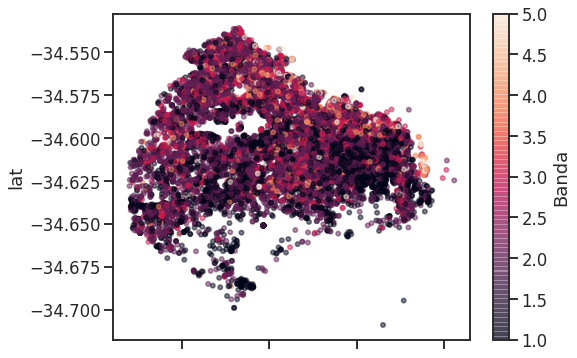

In [171]:
# Podemos aplicar tambien algunas funciones de plot sobre el dataframe usando pd.plot( )
properati.plot(kind='scatter', x='lon', y='lat', c='Banda',
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(8,6))
plt.show()

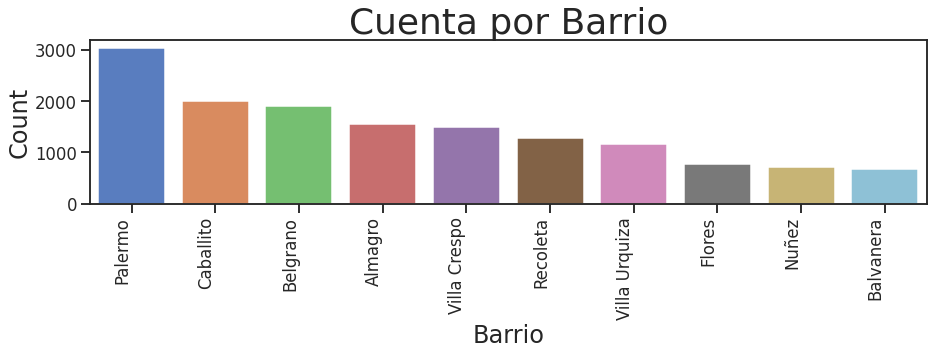

In [172]:
#Visualización Top 10 de la Variable Barrio
top_barrios = properati['l3'].value_counts().index[0:10]


plt.figure(figsize=(15,3))
g = sns.countplot(x='l3',data=properati, palette = "muted",order=top_barrios)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cuenta por Barrio',size = 36)
plt.xlabel("Barrio",size = 24)
plt.ylabel("Count",size = 24)
plt.show()

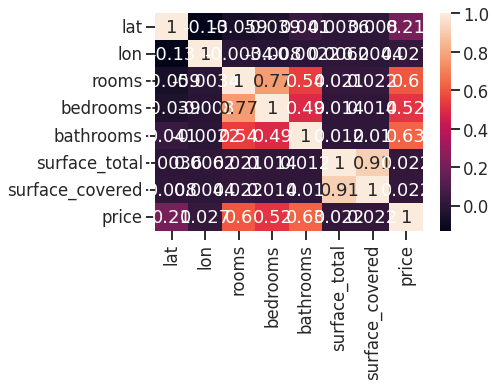

In [173]:
#Matriz de correlación 
properati_sns=properati.drop(['log_price','Banda',],axis=1)
sns.heatmap(properati_sns.corr(),annot=True)
plt.show()

In [174]:
properati.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,log_price,Banda
0,-34.618041,-58.475124,Villa del Parque,2.0,1.0,1.0,123.496416,94.800184,89000.0,Departamento,11.396403,1.0
1,-34.620686,-58.453972,Caballito,3.0,2.0,2.0,123.496416,94.800184,190000.0,Departamento,12.154785,2.0
2,-34.590569,-58.425215,Palermo,3.0,2.0,2.0,98.000000,68.000000,360000.0,Departamento,12.793862,4.0
3,-34.577440,-58.485041,Villa Urquiza,4.0,4.0,1.0,118.000000,96.000000,285000.0,Departamento,12.560248,3.0
4,-34.615851,-58.439566,Caballito,2.0,11.0,1.0,61.000000,52.000000,145000.0,Departamento,11.884496,2.0


#Aprendizaje Supervisado

In [175]:
##planteo regresion desde aca

In [176]:
#importar librerias y modelos de ML
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [177]:
properati = properati.drop(['lat','lon','Banda','log_price'],axis=1)

In [178]:
#diferenciar al precio que es el target
y = np.array(properati[["price"]])
x = properati.drop(['price'], axis=1)

In [179]:
#Creación de dummies en variables categóricas Property type y l3(Barrio)
dummies = pd.get_dummies(data=x, columns=['l3','property_type'])
x = pd.concat([x,dummies],axis=1) 
#x = properati.drop(['l3','property_type'], axis=1)

In [180]:
x.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,rooms,bedrooms,bathrooms,...,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Departamento,property_type_PH
0,Villa del Parque,2.0,1.0,1.0,123.496416,94.800184,Departamento,2.0,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
1,Caballito,3.0,2.0,2.0,123.496416,94.800184,Departamento,3.0,2.0,2.0,...,0,0,0,0,0,0,0,0,1,0
2,Palermo,3.0,2.0,2.0,98.000000,68.000000,Departamento,3.0,2.0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,Villa Urquiza,4.0,4.0,1.0,118.000000,96.000000,Departamento,4.0,4.0,1.0,...,0,0,0,0,0,0,1,0,1,0
4,Caballito,2.0,11.0,1.0,61.000000,52.000000,Departamento,2.0,11.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [181]:
x = x.drop(['l3','property_type'], axis=1)

In [182]:
x.shape

(24084, 68)

In [183]:
#Separación del dataset en subconjuntos para train y test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

In [184]:
xtrain.shape

(16858, 68)

In [185]:
#Separar dummies para preprocesar xtrain y xtest 
x_train_no_dummies=xtrain.iloc[:, 0:5] # Primeras cinco columnas
x_test_no_dummies=xtest.iloc[:, 0:5] # Primeras cinco columnas

#Estandarizar con standardscaler
scaler = preprocessing.StandardScaler().fit(x_train_no_dummies)
x_train_no_dummies = scaler.transform(x_train_no_dummies)
x_test_no_dummies = scaler.transform(x_test_no_dummies)

In [186]:
#variables Dummies
x_train_dummies=xtrain.iloc[:, 5:]
x_test_dummies=xtest.iloc[:, 5:]
#Unir Dummies a no dummies para comenzar modelos de regresion
xtrain_scal = np.concatenate([x_train_no_dummies, x_train_dummies],axis=1)
xtest_scal = np.concatenate([x_test_no_dummies, x_test_dummies],axis=1)

In [187]:
xtrain_scal

array([[ 0.45914616,  0.2699491 , -0.57471574, ...,  0.        ,
         0.        ,  1.        ],
       [-1.26647774, -1.96961875, -0.57471574, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40366579, -0.84983483, -0.57471574, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.26647774,  0.2699491 , -0.57471574, ...,  0.        ,
         1.        ,  0.        ],
       [-1.26647774, -0.84983483, -0.57471574, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.32195811,  0.2699491 ,  1.10907952, ...,  0.        ,
         1.        ,  0.        ]])

In [188]:
xtrain_scal.shape

(16858, 68)

##Modelo Knn Regresor

In [189]:
knn = KNeighborsRegressor(weights = "distance")
parameters_k = np.arange(8,15,2)
parameters_knn = [{'n_neighbors': parameters_k}]
regressor_knn = GridSearchCV(knn, parameters_knn, refit = True, cv=5, verbose=True)

In [190]:
regressor_knn.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid=[{'n_neighbors': array([ 8, 10, 12, 14])}],
             verbose=True)

In [191]:
regressor_knn.best_params_

{'n_neighbors': 14}

In [192]:
ypred2 = regressor_knn.predict(xtest_scal)

In [193]:
mse_knn1 = np.sqrt(mean_squared_error(ytest, ypred2))
mse_knn1

50601.19218636385

##RandomForest Regressor

In [194]:
rf= RandomForestRegressor()
param_trees = {'n_estimators': [100, 200,300], 
               'max_features': [0.5, 'sqrt','log2'],  
               'min_samples_leaf':[0.5, 1,3]}

In [195]:
regressor_rf = GridSearchCV(rf, param_grid = param_trees, refit = True, cv = 3)
regressor_rf.fit(xtrain, ytrain.ravel())

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': [0.5, 'sqrt', 'log2'],
                         'min_samples_leaf': [0.5, 1, 3],
                         'n_estimators': [100, 200, 300]})

In [196]:
print(regressor_rf.best_params_)

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 300}


In [197]:
print(regressor_rf.best_score_)

0.7486187246591315


In [198]:
ypred3 = regressor_rf.predict(xtest_scal)
ypred3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([153902.59551515, 106050.79061786, 111457.7154152 , ...,
       100809.8092907 , 127988.94480804, 111791.02406601])

In [199]:
mse_rf1 = np.sqrt(mean_squared_error(ytest, ypred3))
mse_rf1
#Tiene mayor MSE que Knn Regressor

73098.78690436362

##SVR

In [200]:
svreg = SVR()
param_svreg = {'kernel':('linear', 'rbf'), 'C':[1, 10 ], 'gamma':[ 0.1,1]}
regressor_svr = GridSearchCV(svreg, param_svreg, cv=3, verbose=True)
regressor_svr.fit(xtrain_scal, ytrain.ravel())

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10], 'gamma': [0.1, 1],
                         'kernel': ('linear', 'rbf')},
             verbose=True)

In [201]:
regressor_svr.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [202]:
regressor_svr.best_score_

0.47079148012536165

In [203]:
ypred4 = regressor_svr.predict(xtest_scal)
ypred4

array([229900.86645228, 115517.21879509,  96654.37886221, ...,
       113517.21879509, 148047.60857182, 148014.56345925])

In [204]:
mse_svr1 = np.sqrt(mean_squared_error(ytest, ypred4))
mse_svr1
#Intermedio entre Knn y Randon Forest

64616.1816720469

##Visualización de los 3 métodos

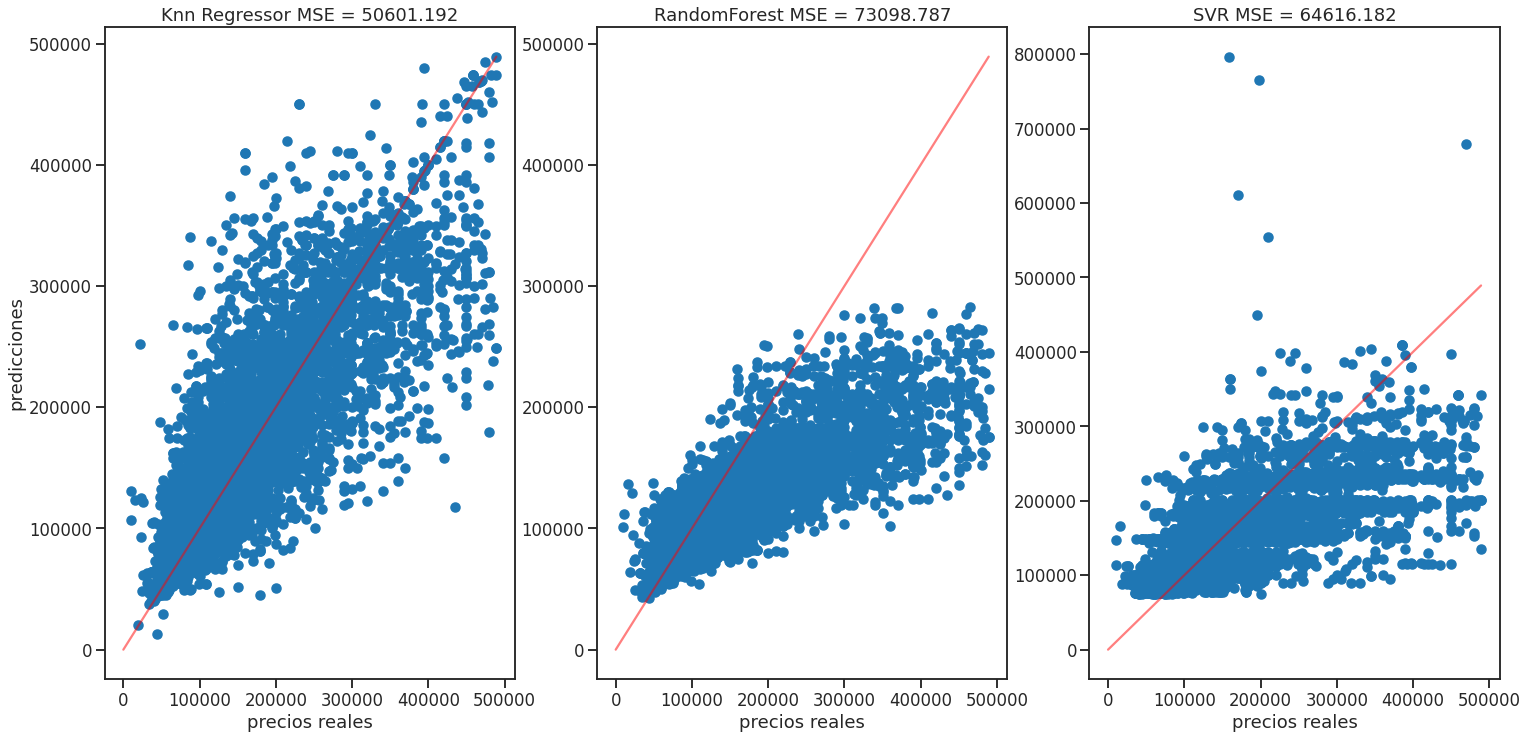

In [205]:
# ploteamos las predicciones de cada modelo 
fig, ax = plt.subplots(1,3, figsize = (25,12))
ax[0].scatter(x=ytest,y=ypred2)
ax[0].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[0].set_title('Knn Regressor MSE = '+str(np.round(mse_knn1,3)))
ax[0].set_xlabel('precios reales')
ax[0].set_ylabel('predicciones')
ax[1].scatter(x=ytest,y=ypred3)
ax[1].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[1].set_title('RandomForest MSE = '+str(np.round(mse_rf1,3)))
ax[1].set_xlabel('precios reales')
ax[2].scatter(x=ytest,y=ypred4)
ax[2].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[2].set_title('SVR MSE = '+str(np.round(mse_svr1,3)))
ax[2].set_xlabel('precios reales')
plt.show()

##Análisis de componentes principales (PCA)

In [206]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 2
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
pca.fit(x_train_no_dummies)
xpcatrain = pca.transform(x_train_no_dummies)
xpcatest = pca.transform(x_test_no_dummies)
x=xpcatest
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_
pca.explained_variance_

array([2.20795341, 1.90154436])

In [207]:
pca.explained_variance_ratio_

array([0.44156449, 0.38028631])

In [208]:
# observamos el shape de la matriz obtenida del PCA.
xpcatrain.shape

(16858, 2)

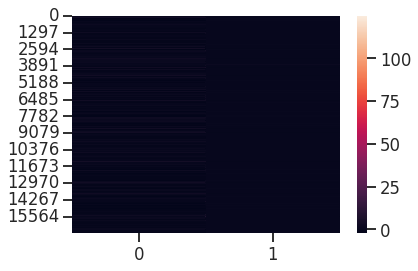

In [209]:
sns.heatmap(xpcatrain)

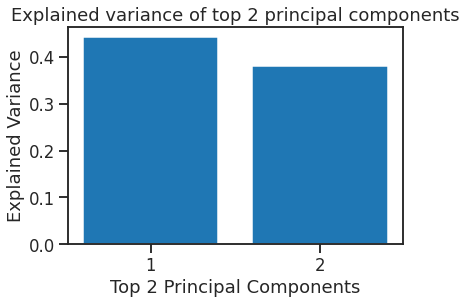

In [210]:
#Observamos los autovalores obtenidos del PCA
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' +str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

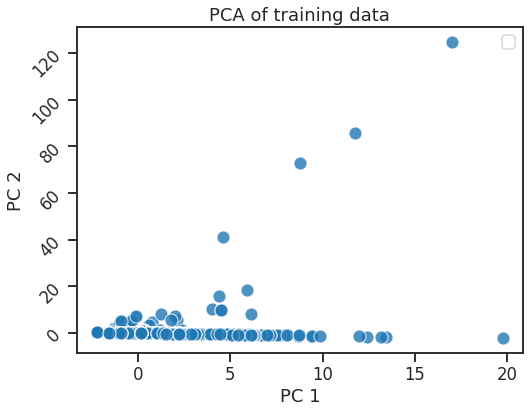

In [211]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
ax1 = plt.subplot()
sns.scatterplot(x=xpcatrain[:,0], y=xpcatrain[:,1], alpha = 0.8, s= 170)
ax1.legend(bbox_to_anchor=(-0.2, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.figure.set_size_inches( (8,6) )
ax1.set_title("PCA of training data")
plt.yticks(rotation=45) 
plt.legend()
plt.show()

In [212]:
#Unimos las dummies
xpcatrain = np.concatenate([xpcatrain, x_train_dummies],axis=1)
xpcatest = np.concatenate([xpcatest, x_test_dummies],axis=1)


In [213]:
#Nos quedamos con los componentes que acumulan el 99% de la variabilidad original.

In [214]:
#Volvemos a predecir luego de aplicar la técnica de reducción de la dimensionalidad

###Knn con PCA

In [215]:
regressor_knn.fit(xpcatrain, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid=[{'n_neighbors': array([ 8, 10, 12, 14])}],
             verbose=True)

In [216]:
regressor_knn.best_params_

{'n_neighbors': 14}

In [217]:
ypred5 = regressor_knn.predict(xpcatest)

In [218]:
mse_knn = np.sqrt(mean_squared_error(ytest, ypred5))
mse_knn
#Aumentó el error respecto del modelo sin PCA

50849.51752627001

###RandonForest con PCA

In [219]:
regressor_rf.fit(xpcatrain, ytrain.ravel())

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': [0.5, 'sqrt', 'log2'],
                         'min_samples_leaf': [0.5, 1, 3],
                         'n_estimators': [100, 200, 300]})

In [220]:
print(regressor_rf.best_params_)

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}


In [221]:
print(regressor_rf.best_score_)

0.7492492644399978


In [222]:
ypred6 = regressor_rf.predict(xpcatest)
ypred6

array([295470.06269841, 117602.8084786 , 142974.42875   , ...,
        81442.30505019, 166773.60568974, 140117.68333333])

In [223]:
mse_rf = np.sqrt(mean_squared_error(ytest, ypred6))
mse_rf
#Disminuyó el error respecto del modelo sin PCA

43701.139905094606

###SVR con PCA

In [224]:
svreg = SVR()
param_svreg = {'kernel':('linear', 'rbf'), 'C':[10,20 ], 'gamma':[0.01,0.001]}
regressor_svr = GridSearchCV(svreg, param_svreg, cv=3, verbose=True)
regressor_svr.fit(xpcatrain, ytrain.ravel())

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [10, 20], 'gamma': [0.01, 0.001],
                         'kernel': ('linear', 'rbf')},
             verbose=True)

In [225]:
regressor_svr.best_params_

{'C': 20, 'gamma': 0.01, 'kernel': 'linear'}

In [226]:
regressor_svr.best_score_

0.48560559654638197

In [227]:
ypred7 = regressor_svr.predict(xpcatest)
ypred7

array([235277.21205955, 115960.78462064,  98777.20968864, ...,
       111840.78462064, 149864.10262541, 149825.32283041])

In [228]:
mse_svr = np.sqrt(mean_squared_error(ytest, ypred7))
mse_svr
#Aumentó el error respecto del modelo sin PCA

63860.50719956255

###Visualización de los 3 métodos con PCA

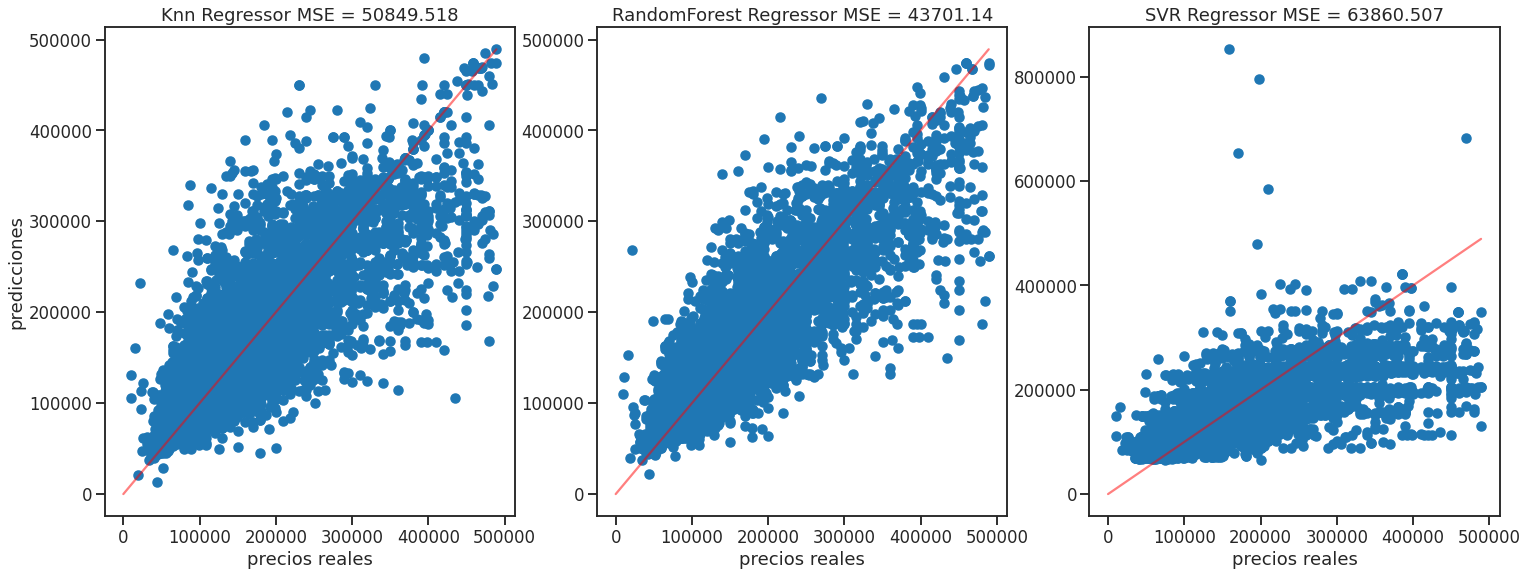

In [229]:
# ploteamos las predicciones de cada modelo 
fig, ax = plt.subplots(1,3, figsize = (25,9))
ax[0].scatter(ytest, ypred5)
ax[0].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[0].set_title('Knn Regressor MSE = '+str(np.round(mse_knn,3)))
ax[0].set_xlabel('precios reales')
ax[0].set_ylabel('predicciones')
ax[1].scatter(ytest, ypred6)
ax[1].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[1].set_title('RandomForest Regressor MSE = '+str(np.round(mse_rf,3)))
ax[1].set_xlabel('precios reales')
ax[2].scatter(ytest, ypred7)
ax[2].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[2].set_title('SVR Regressor MSE = '+str(np.round(mse_svr,3)))
ax[2].set_xlabel('precios reales')
plt.show()